In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [449]:
def clean_dataset(dataset):
    dataset.drop_duplicates()

    for i in range(dataset.columns.size):
        if (dataset[dataset.columns[i]].isnull().sum() and float(dataset[dataset.columns[i]].isnull().sum()) < dataset.shape[0]/90):
            dataset.dropna(subset=[dataset.columns[i]], inplace=True)

    dataset['Высота потолков, м'].fillna(2.65, inplace=True)
    dataset['Тип этажа'].fillna(
        dataset['Тип этажа'].mode().iloc[0], inplace=True)
    dataset['Состояние ремонта'].fillna('Нет', inplace=True)
    dataset.loc[dataset['Количество комнат']
                == 'Студия', 'Количество комнат'] = 0
    dataset['Дата снятия (продажи)'].fillna(np.nan, inplace=True)
    dataset['Школа\nм'].fillna(
        dataset['Школа\nм'].median(axis=0), inplace=True)
    dataset['Детский сад\nм'].fillna(
        dataset['Детский сад\nм'].median(axis=0), inplace=True)

    numdata = dataset.select_dtypes(include=["number"])
    for i in range(numdata.columns.size):
        dataset = dataset[
            (dataset[numdata.columns[i]] >= dataset[numdata.columns[i]].quantile(0.005)) & (dataset[numdata.columns[i]] <= dataset[numdata.columns[i]].quantile(0.995))]

    return dataset


In [450]:
def reform_data(dataset):
    for i in dataset.select_dtypes(include=[object]):
        if (dataset[i].unique().size > 2):
            dataset[i] = dataset[i].astype('category')
    dataset['Количество комнат'] = dataset['Количество комнат'].astype('int64')
    binary_columns = [
        i for i in dataset.columns if dataset[i].dtype.name == 'object']
    categorical_columns = [
        i for i in dataset.columns if dataset[i].dtype.name == 'category']
    numerical_columns = [i for i in dataset.columns if (
        dataset[i].dtype.name != 'category' and dataset[i].dtype.name != 'object')]

    binary_columns = ['Тип рынка', 'Парковка',
                      'Актуальность на дату послед. проверки']
    include_binary_columns = ['Тип рынка', 'Парковка']
    binary_columns = include_binary_columns
    data_binary = dataset[binary_columns]
    data_binary = data_binary.apply(lambda x: pd.factorize(x)[0])

    numerical_columns = ['Общая площадь,\nкв.м', 'Жилая площадь,\nкв.м', 'Площадь кухни,\nкв.м', 'Высота потолков, м', 'Год постройки', 'Этаж', 'Этажность', 'Количество комнат', 'Цена предложения,\nруб.',
                         'Удельная цена, руб./кв.м', 'Колич.  Просмотр.', 'Колич.  Просм. в день', 'Остановка\nм', 'Парк\nм', 'Центр\nкм', 'Станция метро\nм', 'Школа\nм', 'Детский сад\nм']
    include_numerical_columns = ['Общая площадь,\nкв.м', 'Этаж',
                                 'Остановка\nм', 'Парк\nм', 'Центр\nкм', 'Школа\nм', 'Детский сад\nм']
    numerical_columns = include_numerical_columns
    data_numerical = dataset[numerical_columns]

    categorical_columns = ['Функциональная зона', 'Тип дома', 'Класс', 'Тип этажа', 'Состояние ремонта',
                           'Материал стен', 'Дата создания', 'Дата парсинга', 'Дата послед. проверки', 'Дата снятия (продажи)']
    include_categorical_columns = ['Тип дома',
                                   'Класс', 'Тип этажа', 'Материал стен']
    categorical_columns = include_categorical_columns
    data_categorical = pd.get_dummies(
        dataset[categorical_columns], drop_first=True)

    data = pd.concat((data_binary, data_numerical, data_categorical,
                     dataset['Удельная цена, руб./кв.м']), axis=1)
    return data


### Те же действия что и раньше

In [451]:
df = pd.read_excel('apartment_data.xlsx',
                   usecols=lambda x: 'Unnamed' not in x, skiprows=1)
dataset = clean_dataset(df)
data = reform_data(dataset)

In [452]:
# index = data[data['Тип рынка'] == 0].index
# data.drop(index, inplace=True)
# data
data.describe()

,Тип рынка,Парковка,"Общая площадь,\nкв.м",Этаж,Остановка\nм,Парк\nм,Центр\nкм,Школа\nм,Детский сад\nм,Функциональная зона_Зона автомагистралей,...,Тип дома_Современные,Класс_Комфорт,Класс_Эконом,Класс_Элитный,Тип этажа_Последний,Тип этажа_Средний,Материал стен_Кирпичный,Материал стен_Монолитный,Материал стен_Панельный,"Удельная цена, руб./кв.м"
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.00000,2281.000000,2281.000000,2281.000000,2281.000000,...,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,0.148619,0.416484,49.276896,5.164840,255.505918,732.60719,8.185007,368.666813,304.784305,0.004822,...,0.239807,0.003069,0.995178,0.000438,0.160018,0.695747,0.579570,0.118369,0.300307,122046.488382
std,0.355791,0.493084,17.705299,4.230944,210.649655,502.19881,3.874451,275.999402,236.646162,0.069291,...,0.427059,0.055324,0.069291,0.020938,0.366703,0.460191,0.493736,0.323116,0.458492,31838.550259
min,0.000000,0.000000,19.000000,1.000000,14.000000,50.00000,1.000000,64.000000,53.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68103.000000
25%,0.000000,0.000000,35.000000,2.000000,125.000000,347.00000,5.000000,203.000000,152.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99800.000000
50%,0.000000,0.000000,45.000000,4.000000,197.000000,613.00000,8.000000,301.000000,244.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,114943.000000
75%,0.000000,1.000000,60.000000,7.000000,297.000000,1004.00000,11.000000,434.000000,371.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,138282.000000
max,1.000000,1.000000,136.399994,24.000000,1084.000000,2810.00000,18.000000,2065.000000,1517.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,252268.000000


In [453]:
from sklearn.model_selection import train_test_split

X = data.drop('Удельная цена, руб./кв.м', axis = 1)
y = data['Удельная цена, руб./кв.м']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1824, 40), (457, 40), (1824,), (457,))

### Линейная регрессия

In [454]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [455]:
coeff_linear = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
intercept_linear = regressor.intercept_
print(intercept_linear)
coeff_linear.round(2)


187722.33606477172


,Coefficient
Тип рынка,-9606.62
Парковка,819.66
"Общая площадь,\nкв.м",-387.43
Этаж,999.75
Остановка\nм,0.45
Парк\nм,-5.63
Центр\nкм,-1967.94
Школа\nм,-8.19
Детский сад\nм,1.14
Функциональная зона_Зона автомагистралей,-33861.95


In [456]:
y_pred_train = regressor.predict(X_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
df.head(10).round(2)

,Actual,Predicted
1082,121622,143854.17
1031,236318,165142.27
1172,120120,122982.30
2054,101911,112119.36
2497,90323,100119.34
1032,91803,108034.72
2554,124122,124168.26
1802,116524,127432.55
921,133333,113696.55
1291,110680,123773.43


Считаю скорректированный коэффициент детерминации по этой формуле

In [457]:
def adjR(X, y):
    return 1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [458]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_train, y_pred_train)))
print('Медиана абсолютной модели:',
      metrics.mean_absolute_error(y_train, y_pred_train)/y.mean())
print('Adjusted R-squared:', 1 - (1-regressor.score(X, y))
      * (len(y)-1)/(len(y)-X.shape[1]-1))

Mean Absolute Error: 18000.35701615298
Root Mean Squared Error: 24773.26858507817
Медиана абсолютной модели: 0.14748770943552367
Adjusted R-squared: 0.36580955751376865


In [459]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(y.shape, y_pred.shape)
df.head(10).round(2)

(2281,) (457,)


,Actual,Predicted
2296,141104,132560.63
1436,90663,107858.52
230,97466,113298.60
694,143312,136591.53
165,136471,116875.90
2196,108607,141220.79
1456,181734,118242.51
1782,89147,103244.99
2568,88571,108687.07
2130,97054,103712.08


In [460]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Медиана абсолютной модели:', metrics.mean_absolute_error(y_test, y_pred)/y.mean())
print('Adjusted R-squared:', 1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Mean Absolute Error: 19642.731997277937
Root Mean Squared Error: 26487.403521053006
Медиана абсолютной модели: 0.16094467163816006
Adjusted R-squared: 0.36580955751376865


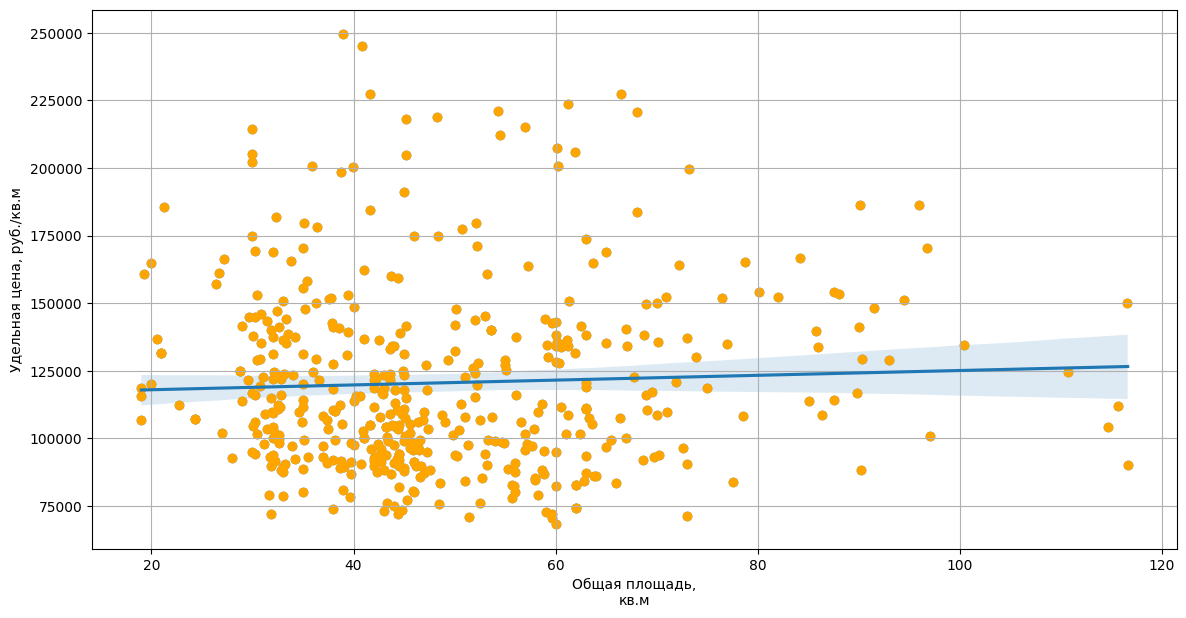

In [461]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(y=y_test, x=X_test['Общая площадь,\nкв.м'])
plt.scatter(X_test['Общая площадь,\nкв.м'], y_test, color="orange")
plt.grid(True)
plt.show()

In [462]:
rows = coeff_linear.copy()
str = 'Материал'
k = [1]
b0 = intercept_linear

for i in rows.index:
    if (str not in i):
        rows.drop(i, inplace=True)

if (rows.index.size > 1):
    for i in range(rows.index.size):
        k.append((b0+rows.iloc[i][0])/b0)

    list = rows.index.to_list()
    list.insert(0, str + '_' + 'Деревянный')
    corr = pd.DataFrame(index=list, columns=list)

    for i in range(corr.index.size):
        for j in range(corr.columns.size):
            corr.iloc[i][j] = k[i]/k[j]

if (rows.index.size == 1):
    for i in range(rows.index.size):
        k.append((b0+rows.iloc[i][0])/b0)

    list = ['Есть', 'Нет']
    corr = pd.DataFrame(index=list, columns=list)

    for i in range(corr.index.size):
        for j in range(corr.columns.size):
            corr.iloc[i][j] = k[i]/k[j]
corr.round(2)

,Материал_Деревянный,Материал стен_Кирпичный,Материал стен_Монолитный,Материал стен_Панельный
Материал_Деревянный,1.0,0.897112,0.878184,0.904159
Материал стен_Кирпичный,1.114688,1.0,0.978901,1.007856
Материал стен_Монолитный,1.138714,1.021554,1.0,1.029579
Материал стен_Панельный,1.106,0.992205,0.971271,1.0


### Полиномиальная регрессия

In [463]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

pf_train = poly.fit_transform(X_train)
pf_test = poly.fit_transform(X_test)

X = pf_train
y = y_train

pfregressor = LinearRegression()
pfregressor.fit(pf_train, y_train)

LinearRegression()

In [464]:
y_train_pred = pfregressor.predict(pf_train)

df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print(pf_train.shape, y_train_pred.shape)
df.head(10).round(2)

(1824, 861) (1824,)


,Actual,Predicted
1082,121622,158115.12
1031,236318,189452.50
1172,120120,130602.90
2054,101911,109003.17
2497,90323,101968.79
1032,91803,101292.47
2554,124122,142215.82
1802,116524,120336.80
921,133333,116940.63
1291,110680,119803.17


In [465]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_train, y_train_pred)))
print('Медиана абсолютной модели:',
      metrics.mean_absolute_error(y_train, y_train_pred)/y.mean())
print('Adjusted R-squared:', 1 - (1-pfregressor.score(X, y))
      * (len(y)-1)/(len(y)-X.shape[1]-1))


Mean Absolute Error: 14628.677151606746
Root Mean Squared Error: 20972.9868827811
Медиана абсолютной модели: 0.11949489618243855
Adjusted R-squared: 0.15366355060810144


In [466]:
y_pred = pfregressor.predict(pf_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(y_test.shape, y_pred.shape)
df.head(10).round(2)

(457,) (457,)


,Actual,Predicted
2296,141104,138289.03
1436,90663,105102.97
230,97466,108737.82
694,143312,152715.33
165,136471,76462.38
2196,108607,156932.48
1456,181734,102274.72
1782,89147,98280.88
2568,88571,101159.72
2130,97054,92370.84


In [467]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Медиана абсолютной модели:', metrics.mean_absolute_error(y_test, y_pred)/y.mean())
print('Adjusted R-squared:', 1 - (1-pfregressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Mean Absolute Error: 24014.451074425135
Root Mean Squared Error: 43572.280082128214
Медиана абсолютной модели: 0.1961629413430248
Adjusted R-squared: 0.15366355060810144


In [468]:
pfregressor.coef_

array([-3.57247701e-06, -1.34999939e+04,  1.04844728e+03,  1.40509753e+03,
        1.39923165e+04, -4.67119785e+02,  5.17474230e+01, -2.37934586e+03,
        4.17649059e+02, -3.01219412e+02, -1.15390003e+04,  5.60071832e-02,
       -5.50794979e-03, -2.07730613e-06, -9.96129637e+03, -1.33772790e+03,
        6.93672193e-01,  9.32879274e-03, -4.54953872e+03,  2.18424580e+04,
       -4.65536904e+03,  9.36611890e-02,  9.97100533e+03, -7.19553500e-02,
       -7.41481273e-07,  6.07105199e+02, -2.92833263e+03,  1.65315695e-01,
        9.24133175e-01,  2.83037114e+03, -2.64966265e+02, -3.32238497e+03,
        1.56815831e+04,  6.20422181e+00, -1.58179058e+01,  6.70361590e-01,
       -2.02767308e+04, -5.85706393e+03, -2.34953507e+03,  1.18758606e+04,
       -9.52331552e+03, -1.34999939e+04, -1.23599150e+04,  1.12047085e+02,
        1.00568786e+03, -2.34803881e+01,  1.79386629e+01,  2.30683583e+03,
        5.37886795e+01, -1.42549296e+01, -8.83317171e-08,  1.53939936e-08,
       -5.14111207e-08, -

In [469]:
coeff_linear = pd.DataFrame(pf_test, columns = poly.get_feature_names_out())
coeff_linear

,1,Тип рынка,Парковка,"Общая площадь,\nкв.м",Этаж,Остановка\nм,Парк\nм,Центр\nкм,Школа\nм,Детский сад\nм,...,Тип этажа_Средний^2,Тип этажа_Средний Материал стен_Кирпичный,Тип этажа_Средний Материал стен_Монолитный,Тип этажа_Средний Материал стен_Панельный,Материал стен_Кирпичный^2,Материал стен_Кирпичный Материал стен_Монолитный,Материал стен_Кирпичный Материал стен_Панельный,Материал стен_Монолитный^2,Материал стен_Монолитный Материал стен_Панельный,Материал стен_Панельный^2
0,1.0,0.0,0.0,32.599998,6.0,85.0,1273.0,4.0,307.0,107.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,40.700001,4.0,279.0,679.0,11.0,484.0,231.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,51.299999,5.0,314.0,860.0,11.0,168.0,110.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,31.400000,4.0,138.0,264.0,4.0,427.0,572.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,42.500000,4.0,90.0,550.0,4.0,270.0,214.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,1.0,0.0,1.0,43.599998,9.0,259.0,661.0,8.0,288.0,290.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
453,1.0,0.0,0.0,67.800003,1.0,341.0,870.0,6.0,103.0,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
454,1.0,1.0,0.0,43.000000,5.0,204.0,808.0,7.0,130.0,1302.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
455,1.0,0.0,1.0,69.000000,5.0,323.0,997.0,13.0,247.0,257.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


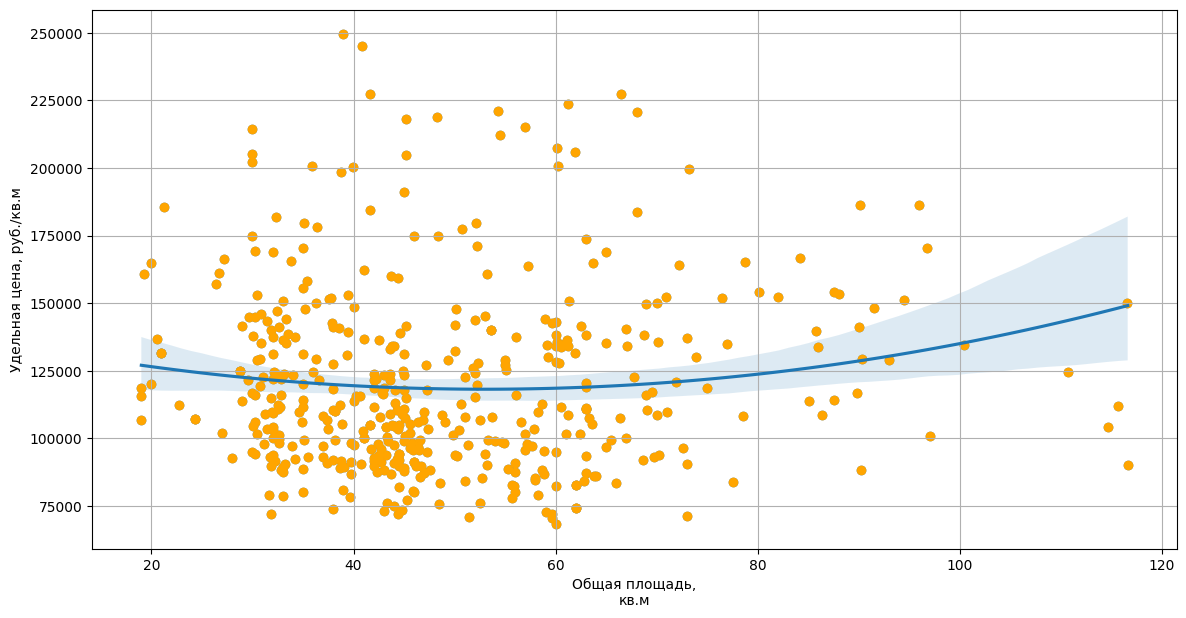

In [470]:
degree = 2
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(y=y_test, x=X_test['Общая площадь,\nкв.м'], order=degree)
plt.scatter(X_test['Общая площадь,\nкв.м'], y_test, color="orange")
plt.grid(True)
plt.show()

In [471]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

err_train = metrics.mean_absolute_error(y_train, rf.predict(X_train))
err_test = metrics.mean_absolute_error(y_test, rf.predict(X_test))
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  1076.3163377192982
Ошибка на тестовой выборке:  20376.26695842451
